In [127]:
!pip3 install numpy
!pip3 install matplotlib

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [129]:
n = 50
reduced_n = 25

Here I initialize the values of spring constants to random values also n is degree of freedom system that it is

In [130]:
def generate_data():
    ki=np.random.normal(64, 18 , n)
    print("values of indvidual spring constant are")
    print(ki)

    print(" "*10*n)

    f=np.random.normal(0, 10 , n)
    print("values of force are")
    print(f)
    print(" "*5)
    return ki,f

In [131]:
'''The stiffness matrix function
creates the stiffness matrix for the given conditions 
first and last rows are hard-coded rest anre handled by 
the loop assuming the system is atleast 2 dof system
since we have to do pca'''
def stiffness_matrix(ki):
    k=np.array([[0.0 for i in range(n)] for i in range(n)])
    k[0][0]=ki[0]
    k[0][1]=-ki[1]
    for i in range(1,n-1):
        k[i][i]=ki[i]+ki[i+1]
        k[i][i+1]=-ki[i+1]
        k[i][i-1]=-ki[i-1]
    k[n-1][n-1]=ki[n-1]
    k[n-1][n-2]=-ki[n-2]
    return k      

In [132]:
def eigen(k):
    #getting the eigenvalues and eigen vectors
    eigenvalues, eigenvectors = np.linalg.eig(k)
    #creating a dictionary with eigen value as key and vector as value
    eig = {}
    for i in range(len(eigenvalues)):
        eig[eigenvalues[i]] = eigenvectors[:,i]
    #sorting the eigen values in asscending order
    eig = {i: eig[i] for i in sorted(eig)}
    eigenvalues=list(eig.keys())
    eigenvectors=list(eig.values())
    x=[0 for i in range(n)]
    return eigenvalues,eigenvectors

Mode Shape Approach

In [133]:
'''function that does the job 
of mode shape approach'''
def Mode_shape_approach(f,eigenvalues,eigenvectors):
    #initializing the list
    x=[0]*n
    for i in range(reduced_n):
        x+=np.multiply(((np.dot(f,eigenvectors[i]))/eigenvalues[i]),eigenvectors[i])
    #printing the prediction and real value
    print("value of x is ")
    print(x)
    return x
        

In [134]:
def MSA():
    ki,f=generate_data()
    k=stiffness_matrix(ki)
    eigenvalues,eigenvectors=eigen(k)
    x=Mode_shape_approach(f,eigenvalues,eigenvectors)
    return x
MSA()

values of indvidual spring constant are
[54.29238059 86.84465762 27.61260724 69.97239766 71.04894466 74.10948171
 81.67784197 51.57315432 62.76767561 87.62155055 66.01002499 33.7204217
 77.75171424 35.62412455 73.66906071 59.5758738  85.39269967 99.95054678
 47.61840269 69.55792124 33.56694699 70.02213906 72.77847874 50.70395819
 40.85174577 53.75750076 51.02080333 59.58028975 72.3003953  68.69374108
 91.8754437  91.78881279 78.68708311 71.18200695 81.55861533 80.21188593
 53.55836006 86.28456984 83.95945047 47.52931966 55.43601847 84.940977
 50.49979726 58.08329148 67.34648325 35.45907338 73.06848226 48.88778808
 79.86158488 54.72956633]
                                                                                                                                                                                                                                                                                                                                                                 

array([ 7.55168322e+00,  4.78372090e+00,  5.11732949e+00,  1.31480761e+00,
        7.31270785e-01,  3.23987330e-01,  9.56070400e-02, -4.18979499e-02,
       -1.32672876e-02,  7.95053029e-02,  1.97175865e-01,  1.11995969e-01,
       -1.76901361e-01, -5.99331360e-01, -4.53079594e-01, -5.20220366e-01,
       -4.81959007e-01, -6.05959814e-01, -1.04087747e+00, -8.34387065e-01,
       -9.39386681e-01, -4.19870573e-01, -2.43579090e-01,  1.76907507e-01,
        8.01451814e-01,  1.08572610e+00,  1.72968585e+00,  2.44553881e+00,
        3.22941461e+00,  4.35855749e+00,  4.96238017e+00,  6.61459640e+00,
        8.51173023e+00,  9.37746151e+00,  9.34180637e+00,  1.05285682e+01,
        1.20997097e+01,  9.81131983e+00,  1.21413983e+01,  1.57254907e+01,
        1.08545402e+01,  9.14562780e+00,  1.25546946e+01,  9.98675382e+00,
        9.13626382e+00,  9.96647773e+00,  6.11010228e+00,  7.70375625e+00,
        6.70129591e+00,  9.61796650e+00])

In [135]:
#This bock is used to generate data for second part of the question
x_data=[]
for i in range(100):
    x_data.append(MSA())
print(x_data)

values of indvidual spring constant are
[63.4288248  85.91373161 77.39037755 67.91027368 60.68714293 59.87494892
 67.99359497 82.4584383  43.54563266 56.70197681 63.86281672 80.41531994
 73.06809362 47.4354852  87.48699037 81.83757314 41.16803806 81.86451497
 55.66448743 62.20058274 62.01617851 61.02065576 50.13924157 75.21151906
 53.87662777 68.34440544 94.05780187 46.7512346  66.5511379  37.36922198
 89.46367316 97.08333644 55.66977212 61.41784346 59.28418441 58.40693933
 70.20890236 43.52142261 82.85662773 49.9853531  65.62075819 58.89410888
 71.38016209 95.04094127 61.45158328 79.48616987 49.69060836 58.77869013
 54.39848317 40.43588544]
                                                                                                                                                                                                                                                                                                                                                              

value of x is 
[ 0.81396924  0.6820358   0.5166635   0.78297016  0.66708678  1.04258649
  1.03590232  0.65945505  0.4069951   0.3657857   0.42181897  0.32996282
  0.29545283 -0.00652587 -0.44425881 -0.95308126 -1.29667758 -0.76078443
 -0.31290984 -0.19777016 -0.20073672 -0.06352749  0.20625001  0.50424122
  0.56619085  0.16084227 -0.00578857 -0.04715018  0.0257633   0.03422387
 -0.05061216 -0.1440736  -0.06327011  0.08249887  0.22207074  0.32693835
  0.08958198 -0.03288528 -0.10580114 -0.09725021 -0.0558193   0.02789749
  0.29222239  0.26247967  0.28127319  0.13361372  0.02748972  0.01688322
  0.02556223  0.01582914]
values of indvidual spring constant are
[ 77.29962969 103.04461077  76.8009261   71.57022489  76.76259447
  38.84613773  44.92430691  73.57399597  51.37347985  82.15427283
  32.89512199  86.61813101  55.012273    55.21736124  23.53960715
 105.74048092  89.03534894  86.39085656  52.34398212  54.68922353
  52.43770198  49.68018576  39.82957842  72.0919649   77.18822828
  65.

value of x is 
[ 1.4233588   1.60275293  1.70451047  1.19890975  0.67715447  0.77801672
  0.70444194  0.60693155  0.31986684  0.04834704 -0.14930273 -0.42908053
 -0.45834441 -0.64346668 -0.99308879 -1.02445353 -1.76560564 -2.1966626
 -3.01126307 -3.9188395  -2.36307544 -1.11745676 -1.25927249 -1.28937956
 -0.83874114 -0.47717889  0.12818962  0.58323867  0.93765651  1.21176796
  1.91056424  1.43696043  1.10300627  0.94405189  1.35719219  0.81414324
  0.81127609  0.67648132  0.95946639  0.95310062  1.46450084  1.31705454
  1.34165913  2.0558518   1.45658358  1.24603724  1.25184242  1.00189835
  1.06811287  1.16237829]
values of indvidual spring constant are
[52.37373095 68.35910838 70.35843713 42.01767044 53.98100615 66.45852498
 61.96555478 47.94574664 71.81885976 89.06471418 35.29936994 60.72921579
 48.59032776 66.57699976 29.00878836 66.04715153 40.44287344 54.52004196
 88.35735464 58.12344142 61.86554015 86.45968672 74.12750853 74.39258038
 79.73859906 61.85258322 77.7060937  67.9723

PCA

In [136]:
mean = np.sum(x_data, axis=1)
mean = np.multiply(1/len(x_data),mean)

defining covariance matrix and creating it 

In [137]:
'''This funcion is used to generte the 
covariance matrix'''
def covarince_matrix(data_set):
    E=np.array([[0 for i in range(n)] for j in range(n)])
    for i in range(n):
        for j in range(n):
            E[i][j]=(data_set[i]-mean[i])*(data_set[j]-mean[j])
    return E

In [138]:
def eigen_of_E(E):
    #getting the eigenvalues and eigen vectors
    eigenvalues, eigenvectors = np.linalg.eig(E)
    #creating a dictionary with eigen value as key and vector as value
    eig = {}
    for i in range(len(eigenvalues)):
        eig[eigenvalues[i]] = eigenvectors[:,i]
    #sorting the eigen values in asscending order
    eig = {i: eig[i] for i in sorted(eig)}
    eigenvalues=list(eig.keys())
    eigenvectors=list(eig.values())
    return eigenvalues,eigenvectors

In [139]:
data1=x_data[0]
eigenvalue,eigenvector=eigen_of_E(covarince_matrix(data1))

In [140]:
ki,f=generate_data()
k=stiffness_matrix(ki)

values of indvidual spring constant are
[ 34.39849668 102.23098518  50.71934197 100.63653361  31.80226069
 102.91910971  91.3605967   45.00914305  83.35947062  45.29809953
  47.14189287  53.85693668  55.64346694  71.08677792  72.73042043
  49.36184745  52.92031499  16.58577466  63.52665169  56.60693882
  49.26745806  41.86757466  70.71183494  38.90255452  55.82937298
  64.1800202   58.36625531  58.32331909  41.08030044  77.98615191
  50.05103435  37.71853243  67.52261148  63.56963218  60.67668644
  58.33952001  77.12147483  54.26410035  65.24952436  36.44225143
  52.34863693  61.77250292  47.60561198  68.25083886  53.46354984
  55.80446451  65.61313735  73.61105941  53.63946982  61.35089629]
                                                                                                                                                                                                                                                                                                           

This block is used to calculate the data after reducing it to the n eigen vectors that are founcd fro the covarince matrix

In [141]:
def reducex(x,reduced_n):
    reducedx=np.array([0.0 for i in range(n)])
    for i in range(reduced_n):
        reducedx+=np.multiply((np.dot(x,eigenvector[len(eigenvector)-i-1])),eigenvector[len(eigenvector)-i-1])
    return reducedx 

In [142]:
'''This function calculates mean square
error for given no of eigen vectors'''
def mean_square_error(x,reducedx):
    f=np.multiply(k,x)
    reducedf=np.multiply(k,reducedx)
    mse = np.mean((f - reducedf) ** 2)
    return mse
    
   

In [143]:
'''This function plots mse with 
respect to different r'''
def plotter():
    no_of_vectors=[i+1 for i in range(n)]
    mse_values=[]
    x=data1
    for i in range(1,n+1):
        reducedx=reducex(x,i)
        mse_values.append(mean_square_error(x,reducedx))
    mse_values=np.multiply(1/n,mse_values)
    # Plot the two arrays
    plt.plot(no_of_vectors, mse_values)
    
    # Add labels and title
    plt.xlabel('no of eigen vectors')
    plt.ylabel('Mean square error')
    plt.title('Mean Square error vs no of eigen vectors')

    plt.show()

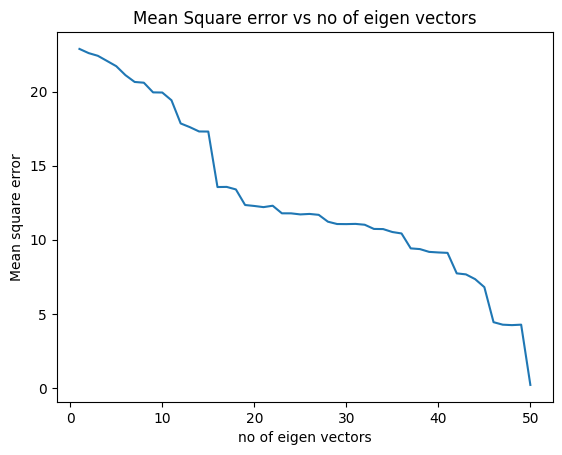

In [144]:
plotter()